# Q7

+ Build a linear model for the stackloss dataset to predict the value of StackLoss from the other (independent) variables. 
+ Iterate to include appropriate quadratic terms.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error



df = pd.read_csv("data/stackloss.csv")
# print(type(df))
df.head()

,AirFlow,WaterTemp,AcidConc,StackLoss
0,80,27,89,42
1,80,27,88,37
2,75,25,90,37
3,62,24,87,28
4,62,22,87,18


### Explore the data

In [4]:
print("Rows ", len(df))
print("Columns ", len(df.columns))
print(df.shape)

print(df.describe())

Rows  21
Columns  4
(21, 4)
         AirFlow  WaterTemp   AcidConc  StackLoss
count  21.000000  21.000000  21.000000  21.000000
mean   60.428571  21.095238  86.285714  17.523810
std     9.168268   3.160771   5.358571  10.171623
min    50.000000  17.000000  72.000000   7.000000
25%    56.000000  18.000000  82.000000  11.000000
50%    58.000000  20.000000  87.000000  15.000000
75%    62.000000  24.000000  89.000000  19.000000
max    80.000000  27.000000  93.000000  42.000000


**This is a very small dataset. Just 21 instances.**

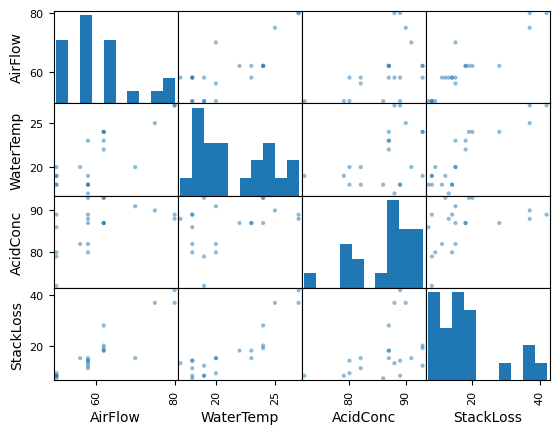

In [6]:
# Draw scatter matrix
# scatter_matrix(df, figsize=(10, 10))
scatter_matrix(df)
plt.show()
# plt.savefig('plots/p3stacklossScatter.png')

**Note: Both Airflow and WaterTemp could have a quadratic dependency**

### Build the model

In [9]:
X = df.drop('StackLoss', axis='columns')
X.head()

,AirFlow,WaterTemp,AcidConc
0,80,27,89
1,80,27,88
2,75,25,90
3,62,24,87
4,62,22,87


In [10]:
X = df.drop('StackLoss', axis='columns')
y = df.StackLoss

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)


print('R squared:', model.score(X,y))

yhat = model.predict(X_test)

print('RMSE', root_mean_squared_error(y_test, yhat))


R squared: 0.9013813070763418
RMSE 3.772926357336114


## View the test data

In [12]:
X_test.head()

,AirFlow,WaterTemp,AcidConc
15,50,18,86
10,58,18,89
3,62,24,87
18,50,20,80
17,50,19,79


# Iterate and use quadratic terms

In [14]:
X = df.drop('StackLoss', axis='columns')
y = df.StackLoss

X['AFsquared'] = np.square(X.AirFlow)
X['WTsquared'] = np.square(X.WaterTemp)



In [15]:
X.head()

,AirFlow,WaterTemp,AcidConc,AFsquared,WTsquared
0,80,27,89,6400,729
1,80,27,88,6400,729
2,75,25,90,5625,625
3,62,24,87,3844,576
4,62,22,87,3844,484


In [16]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

print('R squared:', model.score(X,y))
yhat = model.predict(X_test)
print('RMSE', root_mean_squared_error(y_test, yhat))

R squared: 0.9299572940728464
RMSE 3.032666571627027


**Note**
+ R^2 has gone up. This is good but you need to be careful with this, as in general it can go up when more variables are added.
+ RMSE has gone down. This is the important measure. Tells us the model is better on previously unseen data. 

## Make Predictions

In [19]:
# make predictions
# X_new = [[2, 3, 4, 9, 16],
#      [4, 5, 6, 25, 36],
#     [62, 22, 87, 484, 7569]]
# yhat = model.predict(X_new)
# print(f"Prediction of StackLoss is: {yhat}")

X_new = [62, 22, 87, 484, 7569]
X_new = np.array(X_new).reshape(1, -1)
yhat = model.predict(X_new)
print(f"Prediction of StackLoss is: {yhat}")

Prediction of StackLoss is: [1613.84962362]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Model Deployment

In [21]:
import joblib
import os

# save the model
joblib.dump(model, 'q7stackloss-quadratic-model.joblib')

# model is now saved to a file named 'model.joblib'. WE Will use the file in out docker container
print("Model saved successfully!")

# show the file size of the saved model
print("Model file size:", os.path.getsize('q7stackloss-quadratic-model.joblib'))


Model saved successfully!
Model file size: 992


**We can use Containerization to package this model as a Docker Container and deploy it as an API using FASTAPI**